In [2]:
path_lwf = '/home/karokaro/research-repositories/FACIL/results/bloodmnist_lwf_final_bloodmnist'

In [3]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwf) if isfile(join(path_lwf, f))]
onlyfiles

['raw_log-2025-02-03-23-03.txt',
 'raw_log-2025-02-03-23-25.txt',
 'stderr-2025-02-04-00-24.txt',
 'raw_log-2025-02-03-23-51.txt',
 'stdout-2025-02-03-23-36.txt',
 'stdout-2025-02-04-00-24.txt',
 'raw_log-2025-02-04-00-17.txt',
 'args-2025-02-03-23-51.txt',
 'stderr-2025-02-04-00-17.txt',
 'stderr-2025-02-03-23-25.txt',
 'stderr-2025-02-04-00-09.txt',
 'stdout-2025-02-03-23-16.txt',
 'raw_log-2025-02-03-23-36.txt',
 'args-2025-02-04-00-24.txt',
 'stdout-2025-02-03-23-59.txt',
 'stderr-2025-02-03-23-36.txt',
 'raw_log-2025-02-04-00-09.txt',
 'args-2025-02-03-23-59.txt',
 'raw_log-2025-02-03-23-16.txt',
 'stdout-2025-02-04-00-17.txt',
 'args-2025-02-03-23-25.txt',
 'args-2025-02-03-23-36.txt',
 'stderr-2025-02-03-23-16.txt',
 'args-2025-02-03-23-16.txt',
 'stderr-2025-02-03-23-51.txt',
 'stdout-2025-02-04-00-09.txt',
 'raw_log-2025-02-03-23-59.txt',
 'args-2025-02-04-00-17.txt',
 'stdout-2025-02-03-23-03.txt',
 'stderr-2025-02-03-23-03.txt',
 'stderr-2025-02-03-23-59.txt',
 'stdout-2025-

In [4]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [5]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwf, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [6]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwf, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [7]:
res_dict

{'2025-02-03-23-03.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-02-03-23-03',
   'value': 0.5982394814491272},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-02-03-23-03',
   'value': 71.94719471947195},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-02-03-23-03',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-02-03-23-03',
   'value': 0.1},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-02-03-23-03',
   'value': 0.6027634143829346},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-02-03-23-03',
   'value': 71.94719471947195},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-02-03-23-03',
   'value': 4},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-02-03-23-03',
  

In [8]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [3]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [9]:
len(res_dict)

3

In [10]:
import pandas as pd
import numpy as np
from itertools import chain
data = pd.DataFrame({'Approach': list(chain.from_iterable([['LWF' for i in range(4)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(4)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(4)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(4)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_20798/1207693049.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

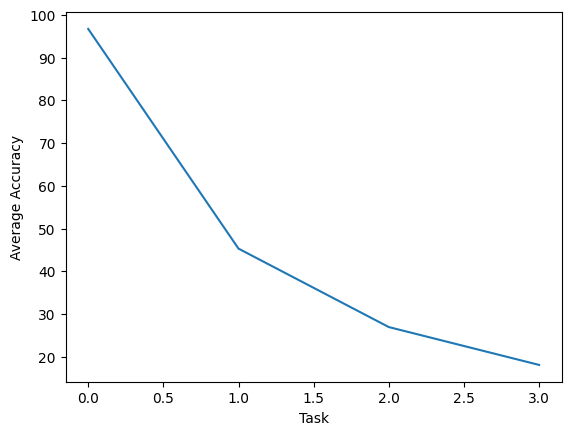

In [11]:
import seaborn as sns
sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)

In [12]:
data.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWF      0                96.70                 NaN
         1                45.30               96.70
         2                26.94               93.65
         3                18.09               89.38

In [13]:
path_ewc = '/home/karokaro/research-repositories/FACIL/results/bloodmnist_ewc_final_bloodmnist'

In [14]:
onlyfiles = [f for f in listdir(path_ewc) if isfile(join(path_ewc, f))]
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [15]:
import json
arg_dict = {}
for file in args:
    with open(join(path_ewc, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [16]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_ewc, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [17]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [3]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [18]:
data_ewc = pd.DataFrame({'Approach': list(chain.from_iterable([['EWC' for i in range(4)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(4)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(4)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(4)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

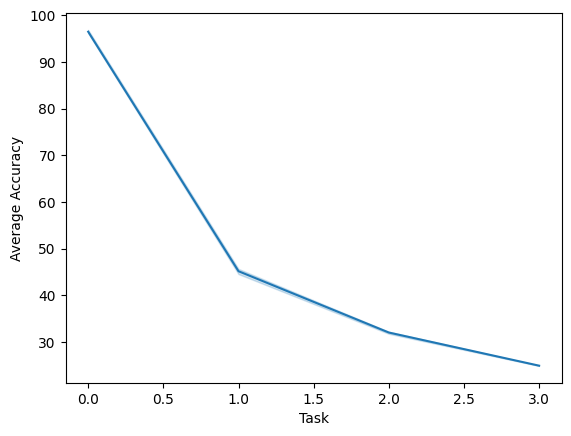

In [19]:
sns.lineplot( data_ewc,  x='Task', y='Average Accuracy')

In [20]:
data_ewc.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
EWC      0                96.51                 NaN
         1                45.17               96.51
         2                32.03               93.42
         3                24.92               94.31

In [21]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/bloodmnist_lwm_final_bloodmnist'

In [22]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['raw_log-2025-02-03-18-40.txt',
 'stderr-2025-02-03-19-08.txt',
 'stderr-2025-02-03-18-20.txt',
 'raw_log-2025-02-03-20-22.txt',
 'stdout-2025-02-03-20-10.txt',
 'raw_log-2025-02-03-20-10.txt',
 'stderr-2025-02-03-19-22.txt',
 'stdout-2025-02-03-19-56.txt',
 'stdout-2025-02-03-20-22.txt',
 'raw_log-2025-02-03-18-55.txt',
 'stderr-2025-02-03-18-55.txt',
 'raw_log-2025-02-03-19-40.txt',
 'raw_log-2025-02-03-18-20.txt',
 'stdout-2025-02-03-19-40.txt',
 'raw_log-2025-02-03-19-22.txt',
 'stdout-2025-02-03-19-22.txt',
 'raw_log-2025-02-03-19-08.txt',
 'stdout-2025-02-03-18-55.txt',
 'args-2025-02-03-20-10.txt',
 'stderr-2025-02-03-20-22.txt',
 'args-2025-02-03-19-56.txt',
 'stdout-2025-02-03-18-20.txt',
 'args-2025-02-03-19-08.txt',
 'args-2025-02-03-19-22.txt',
 'stderr-2025-02-03-19-40.txt',
 'args-2025-02-03-18-40.txt',
 'raw_log-2025-02-03-19-56.txt',
 'args-2025-02-03-20-22.txt',
 'stdout-2025-02-03-18-40.txt',
 'args-2025-02-03-18-20.txt',
 'args-2025-02-03-19-40.txt',
 'args-2025-02-

In [23]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [24]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [25]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [26]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [3]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [27]:
import pandas as pd
import numpy as np
from itertools import chain
data_lwm = pd.DataFrame({'Approach': list(chain.from_iterable([['LWM' for i in range(4)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(4)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(4)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(4)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

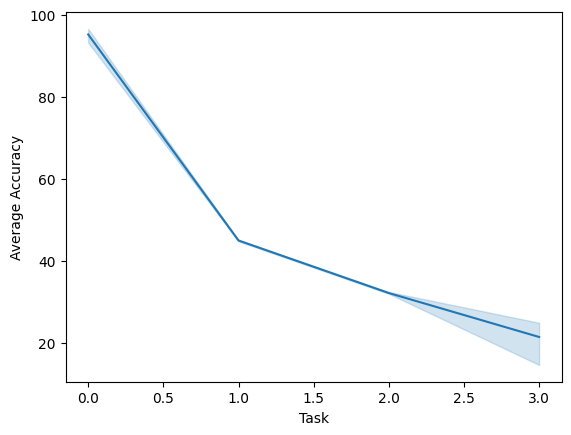

In [28]:
sns.lineplot( data_lwm,  x='Task', y='Average Accuracy')

In [29]:
data_lwm.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWM      0                95.20                 NaN
         1                44.98               95.20
         2                32.17               92.58
         3                21.46               93.89

In [30]:
path_icarl = '/home/karokaro/research-repositories/FACIL/results/bloodmnist_icarl_final_bloodmnist'

In [31]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_icarl) if isfile(join(path_icarl, f))]
onlyfiles

['stderr-2025-02-03-23-34.txt',
 'stderr-2025-02-03-23-09.txt',
 'raw_log-2025-02-03-22-33.txt',
 'stderr-2025-02-03-22-33.txt',
 'stderr-2025-02-03-22-20.txt',
 'raw_log-2025-02-03-23-34.txt',
 'stderr-2025-02-03-23-22.txt',
 'args-2025-02-03-23-22.txt',
 'args-2025-02-03-22-45.txt',
 'args-2025-02-03-22-58.txt',
 'raw_log-2025-02-03-23-22.txt',
 'stderr-2025-02-03-22-58.txt',
 'args-2025-02-03-23-09.txt',
 'stderr-2025-02-03-22-45.txt',
 'stdout-2025-02-03-23-44.txt',
 'args-2025-02-03-22-33.txt',
 'stderr-2025-02-03-23-44.txt',
 'stdout-2025-02-03-22-33.txt',
 'args-2025-02-03-23-34.txt',
 'stdout-2025-02-03-22-45.txt',
 'stdout-2025-02-03-22-09.txt',
 'raw_log-2025-02-03-23-44.txt',
 'args-2025-02-03-22-20.txt',
 'args-2025-02-03-23-44.txt',
 'raw_log-2025-02-03-22-45.txt',
 'stderr-2025-02-03-22-09.txt',
 'raw_log-2025-02-03-22-58.txt',
 'raw_log-2025-02-03-22-09.txt',
 'raw_log-2025-02-03-22-20.txt',
 'stdout-2025-02-03-23-34.txt',
 'raw_log-2025-02-03-23-09.txt',
 'args-2025-02-

In [32]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [33]:
import json
arg_dict = {}
for file in args:
    with open(join(path_icarl, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [34]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_icarl, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [35]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [3]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [36]:
import pandas as pd
import numpy as np
from itertools import chain
data_icarl = pd.DataFrame({'Approach': list(chain.from_iterable([['iCaRL' for i in range(4)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(4)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(4)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(4)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [37]:
data_icarl.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
iCaRL    0                97.70                 NaN
         1                57.04               33.95
         2                55.47               19.72
         3                58.33               17.72

In [38]:
path_rere = '/home/karokaro/research-repositories/FACIL/results/bloodmnist_rere_lrp_final_bloodmnist'

In [39]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_rere) if isfile(join(path_rere, f))]
onlyfiles

['stderr-2025-02-04-19-03.txt',
 'args-2025-02-04-17-24.txt',
 'args-2025-02-04-16-20.txt',
 'args-2025-02-04-15-48.txt',
 'stdout-2025-02-04-15-25.txt',
 'stdout-2025-02-04-17-24.txt',
 'args-2025-02-04-19-03.txt',
 'stdout-2025-02-04-16-20.txt',
 'stdout-2025-02-04-17-55.txt',
 'stderr-2025-02-04-15-48.txt',
 'raw_log-2025-02-04-16-20.txt',
 'raw_log-2025-02-04-14-55.txt',
 'stdout-2025-02-04-19-03.txt',
 'stderr-2025-02-04-17-24.txt',
 'args-2025-02-04-14-55.txt',
 'raw_log-2025-02-04-15-48.txt',
 'stderr-2025-02-04-16-57.txt',
 'raw_log-2025-02-04-16-57.txt',
 'stderr-2025-02-04-15-25.txt',
 'stderr-2025-02-04-14-55.txt',
 'raw_log-2025-02-04-15-25.txt',
 'stderr-2025-02-04-18-30.txt',
 'args-2025-02-04-16-57.txt',
 'stderr-2025-02-04-16-20.txt',
 'args-2025-02-04-18-30.txt',
 'stdout-2025-02-04-16-57.txt',
 'args-2025-02-04-15-25.txt',
 'stdout-2025-02-04-15-48.txt',
 'stdout-2025-02-04-18-30.txt',
 'raw_log-2025-02-04-17-55.txt',
 'raw_log-2025-02-04-19-03.txt',
 'stdout-2025-02-

In [40]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [41]:
import json
arg_dict = {}
for file in args:
    with open(join(path_rere, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [42]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_rere, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [43]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [3]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [44]:
data_rere = pd.DataFrame({'Approach': list(chain.from_iterable([['ReReLRP' for i in range(4)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(4)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(4)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(4)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

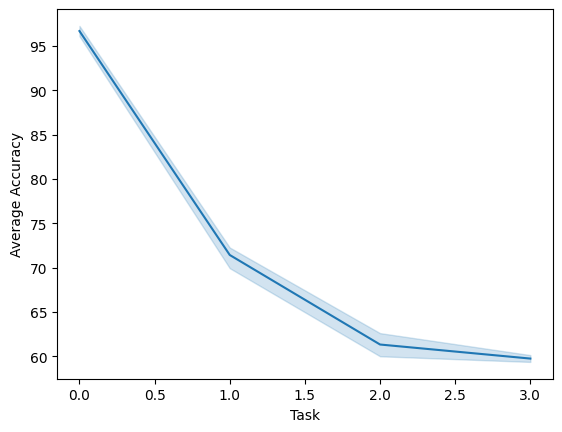

In [45]:
sns.lineplot( data_rere,  x='Task', y='Average Accuracy')

In [46]:
data_rere.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
ReReLRP  0                96.66                 NaN
         1                71.43                8.41
         2                61.34               20.53
         3                59.76               17.37

In [47]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/bloodmnist_joint_finetune_bloodmnist'

In [48]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['raw_log-2025-02-05-20-21.txt',
 'raw_log-2025-02-05-18-01.txt',
 'args-2025-02-05-19-13.txt',
 'stdout-2025-02-05-18-13.txt',
 'args-2025-02-05-20-08.txt',
 'raw_log-2025-02-05-18-13.txt',
 'args-2025-02-05-20-21.txt',
 'stdout-2025-02-05-18-57.txt',
 'stderr-2025-02-05-20-21.txt',
 'args-2025-02-05-19-48.txt',
 'stderr-2025-02-05-18-32.txt',
 'stdout-2025-02-05-19-48.txt',
 'args-2025-02-05-18-01.txt',
 'args-2025-02-05-18-13.txt',
 'raw_log-2025-02-05-18-32.txt',
 'raw_log-2025-02-05-18-57.txt',
 'stdout-2025-02-05-19-13.txt',
 'stdout-2025-02-05-18-01.txt',
 'raw_log-2025-02-05-19-48.txt',
 'raw_log-2025-02-05-20-08.txt',
 'stderr-2025-02-05-18-01.txt',
 'stdout-2025-02-05-20-08.txt',
 'stdout-2025-02-05-18-32.txt',
 'stderr-2025-02-05-19-13.txt',
 'stderr-2025-02-05-18-57.txt',
 'stderr-2025-02-05-19-32.txt',
 'stderr-2025-02-05-20-08.txt',
 'raw_log-2025-02-05-19-32.txt',
 'stderr-2025-02-05-18-13.txt',
 'args-2025-02-05-18-32.txt',
 'stdout-2025-02-05-19-32.txt',
 'stdout-2025-

In [49]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [50]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [51]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [52]:
res_dict

{'2025-02-05-20-21.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-02-05-20-21',
   'value': 0.6446908116340637},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-02-05-20-21',
   'value': 71.94719471947195},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-02-05-20-21',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-02-05-20-21',
   'value': 0.01},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-02-05-20-21',
   'value': 0.6088526844978333},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-02-05-20-21',
   'value': 71.94719471947195},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-02-05-20-21',
   'value': 5},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-02-05-20-21',
 

In [53]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [3]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [54]:
import pandas as pd
import numpy as np
from itertools import chain
data_joint = pd.DataFrame({'Approach': list(chain.from_iterable([['Joint' for i in range(4)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(4)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(4)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(4)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_20798/2585113533.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

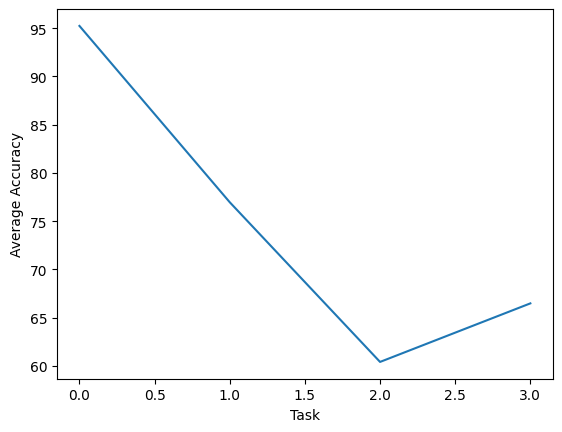

In [55]:
sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)

In [56]:
data_joint.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
Joint    0                95.24                 NaN
         1                76.96               15.40
         2                60.41                9.77
         3                66.48                8.25

In [57]:
data_all = pd.concat([data, data_ewc, data_icarl, data_rere, data_joint, data_lwm], ignore_index=True)

/tmp/ipykernel_20798/68759550.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)


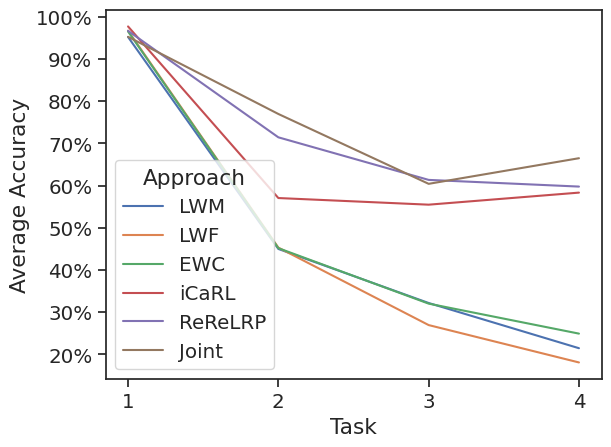

In [58]:
import matplotlib.pyplot as plt
hue_order = ["LWM", "LWF", "EWC", "iCaRL", "ReReLRP", "Joint"]
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)
g.set_xticks(range(4))
g.set_xticklabels([i+1 for i in range(4)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("bloodmnist.pdf", format='pdf', bbox_inches='tight')